In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = np.array([[0, 0]])
P = np.array([[1, 0], [0, 1]])
states = np.random.multivariate_normal(m[0], P, 10)

In [3]:
def c(state):
    return np.linalg.norm(state) - 1

In [4]:
from scipy.optimize import minimize

new_states = np.zeros_like(states)

for i, state in enumerate(states):
    if c(state) > 0:
        opt = minimize(lambda x: x @ np.linalg.inv(P) @ x.T, state, method='SLSQP', constraints={'fun': c, 'type': 'ineq'})
        new_states[i] = opt.x
    else:
        new_states[i] = state

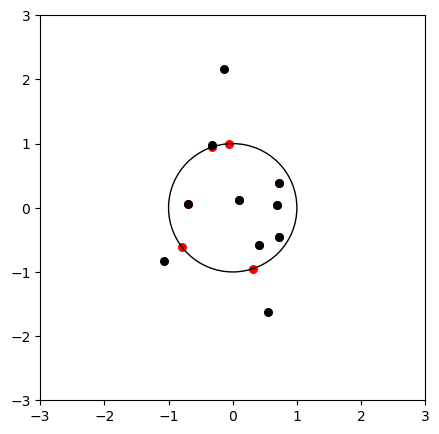

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot circle with radius 1
circle = plt.Circle((0, 0), 1, color='k', fill=False)
ax.add_artist(circle)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')

# Plot points
ax.scatter(new_states[:, 0], new_states[:, 1], color='r', s = 30)
ax.scatter(states[:, 0], states[:, 1], color='k', s=30)


plt.show()

In [10]:
from scipy.optimize import minimize
import numpy as np

def c(state):
    x, y = state
    if 1 <= x <= 40:
        if 1 <= y <= 5:
            return True
    if 40 < x <= 45:
        if 1 <= y <= 20:
            return True
    return False

In [65]:
m = np.array([20.0, 2.5])
P = np.array([[2, 1], [1, 3.4]])
n = 500
particles = np.random.multivariate_normal(m, P, n)

In [66]:
def line_search(m, h, c):
    start = m
    end = h

    while np.linalg.norm(start - end) > 1e-6:
        mid = (start + end) / 2
        if c(mid):
            start = mid
        else:
            end = mid

    return end



In [67]:
new_particles = np.zeros_like(particles)
for i, particle in enumerate(particles):
    if c(particle):
        new_particles[i] = particle
    else:
        new_particles[i] = line_search(m, particle, c)

In [68]:
from matplotlib.axes import Axes

def plot_constrain(self):
    self.hlines(1, 1, 45, color='k', linestyle='solid', linewidth=1)
    self.hlines(5, 1, 40, color='k', linestyle='solid', linewidth=1)
    self.vlines(45, 1, 20, color='k', linestyle='solid', linewidth=1)
    self.vlines(40, 5, 20, color='k', linestyle='solid', linewidth=1)
    self.set_xlim(-5, 51)
    self.set_ylim(-5, 26)
    self.set_aspect('equal')

setattr(Axes, 'plot_constrain', plot_constrain)

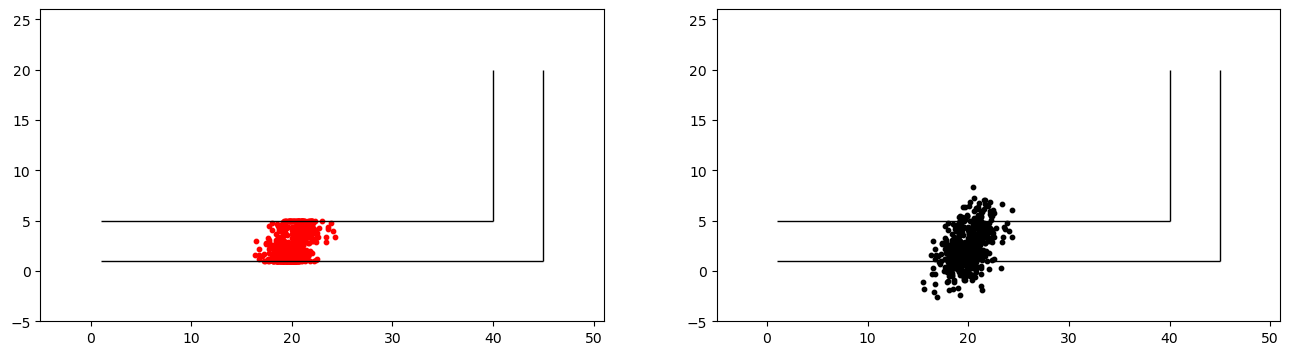

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].scatter(new_particles[:, 0], new_particles[:, 1], s=10, color='r')
ax[0].plot_constrain()
ax[1].scatter(particles[:, 0], particles[:, 1], s=10, color='k')
ax[1].plot_constrain()

plt.show()

In [16]:
def objective(state, P):
    if not c(state):
        # this is a penalty for states where c(state) is False
        return state @ P @ state.T + 1e10
    else:
        return state @ P @ state.T  # this is the matrix multiplication

state_0 = np.array([17, -1])  # initial state, define as per your problem
res = minimize(objective, state_0, args=(P), method='SLSQP')  # Sequential Least SQuares Programming (SLSQP) Optimization
print(res.x)

[-8.76100629 -1.        ]
